In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Exercise 20: The Normal-Gamma Model

Consider the following Bayesian model:

$$
(y_1, \ldots, y_n | \lambda) \sim \text{iid } N(\mu, \frac{1}{\lambda}), \quad \lambda \sim G(\alpha, \beta)
$$

## Notes

1. In the normal-normal model, the normal mean $\mu$ is unknown, and the normal variance $\sigma^2$ is known. Here, we reverse those roles, with $\mu$ known and $\sigma^2$ unknown.
2. For mathematical convenience and conjugacy, we parameterize the normal distribution via the precision parameter $\lambda = \frac{1}{\sigma^2}$ instead of using $\sigma^2$ directly.
3. An equivalent formulation of the normal-gamma model being considered is:

   $$
   (y_1, \ldots, y_n | \sigma^2) \sim \text{iid } N(\mu, \sigma^2), \quad \sigma^2 \sim IG(\alpha, \beta)
   $$

   This formulation is known as the normal-inverse-gamma model.

## Solution to Exercise 20

The posterior density of $\lambda$ is given by:

$$
f(\lambda | y) \propto f(\lambda) f(y | \lambda)
$$

Calculating the terms:

$$
f(\lambda | y) \propto \lambda^{n/2} e^{-\frac{1}{2\lambda} \sum_{i=1}^n (y_i - \mu)^2} \cdot \lambda^{\alpha - 1} e^{-\beta \lambda}
$$

Combining these, we get:

$$
f(\lambda | y) \propto \lambda^{\alpha + \frac{n}{2} - 1} e^{-\left( \beta + \frac{1}{2} \sum_{i=1}^n (y_i - \mu)^2 \right) \lambda}
$$

This shows that the posterior distribution is:

$$
(\lambda | y) \sim G(a, b)
$$

where:

$$
a = \alpha + \frac{n}{2}
$$

$$
b = \beta + \frac{1}{2} s_\mu^2
$$

with 

$$
s_\mu^2 = \sum_{i=1}^n (y_i - \mu)^2
$$

## Notes on the Posterior Mean of $\lambda$

1. The posterior mean of $\lambda$ is:

   $$
   E(\lambda | y) = \frac{a}{b} = \frac{\alpha + \frac{n}{2}}{\beta + \frac{1}{2} s_\mu^2}
   $$

   This converges to $\hat{\lambda} = \frac{2}{s_\mu^2}$ (the maximum likelihood estimate of $\lambda$) as $n \to \infty$. 

2. If $\alpha = \beta = 0$, then:

   $$
   E(\lambda | y) = \hat{\lambda} \text{ exactly for all } n.
   $$

3. The posterior can also be written as:

   $$
   (\lambda | y) \sim G\left(2\alpha + n, 2\beta + ns_\mu^2\right).
   $$

4. Using the method of transformations, we can show that:

   $$
   (u | y) \sim G\left(2\alpha + n, 2\right) \sim \chi^2(2\alpha + n)
   $$

   where $u = (2\beta + ns_\mu^2) \lambda$.

## Credible Intervals

The $1 - A$ CPDR for $u$ is:

$$
\left( \chi^2_{1 - A/2}(2\alpha + n), \chi^2_{A/2}(2\alpha + n) \right)
$$

The $1 - A$ CPDR for $\lambda$ is:

$$
\left( \frac{\chi^2_{1 - A/2}(2\alpha + n)}{2\beta + ns_\mu^2}, \frac{\chi^2_{A/2}(2\alpha + n)}{2\beta + ns_\mu^2} \right)
$$

And the $1 - A$ CPDR for $\sigma^2$ is:

$$
\left( \frac{2\beta + ns_\mu^2}{\chi^2_{A/2}(2\alpha + n)}, \frac{2\beta + ns_\mu^2}{\chi^2_{1 - A/2}(2\alpha + n)} \right)
$$

If $\alpha = \beta = 0$, this is exactly the same as the classical $1 - A$ confidence interval for $\sigma^2$.

## Note 4: Derivation of the Classical $1 - A$ Confidence Interval for $\sigma^2$

The classical $1 - A$ confidence interval for $\sigma^2$ may be derived as follows. First, consider all parameters fixed as constants. Then,

$$
\frac{y_i - \mu}{\sigma} \sim N(0, 1) \quad \text{for } i = 1, \ldots, n.
$$

This implies that:

$$
\left( \frac{y_1 - \mu}{\sigma}, \ldots, \frac{y_n - \mu}{\sigma} \right) \sim \text{iid } \chi^2(1).
$$

Thus, we have:

$$
\sum_{i=1}^n \left( \frac{y_i - \mu}{\sigma} \right)^2 \sim \chi^2(n).
$$

Consequently,

$$
\frac{2ns_\mu^2}{\sigma^2} \sim \chi^2(n).
$$

Now, we want to find the confidence interval:

$$
1 - A = P\left( \chi^2_{1 - A/2}(n) < \frac{2ns_\mu^2}{\sigma^2} < \chi^2_{A/2}(n) \right).
$$

Rearranging gives us:

$$
1 - A = P\left( \frac{2ns_\mu^2}{\chi^2_{A/2}(n)} < \sigma^2 < \frac{2ns_\mu^2}{\chi^2_{1 - A/2}(n)} \right).
$$

This can be expressed as:

$$
P\left( \frac{ns_\mu^2}{\chi^2_{A/2}(n)} < \sigma^2 < \frac{ns_\mu^2}{\chi^2_{1 - A/2}(n)} \right).
$$

## Note 5: A Priori Ignorance

Notes 1 to 3 indicate that in the case of a priori ignorance, a reasonable specification is:

$$
\alpha = \beta = 0, \quad \text{or equivalently, } f(\lambda) \propto \frac{1}{\lambda}, \quad \lambda > 0.
$$

This improper prior can be thought of as the limiting case as \(\epsilon \to 0\) of the proper prior:

$$
\lambda \sim \text{Gam}(\epsilon, \epsilon), \quad \text{where } \epsilon \approx 0.
$$

Observe that:

$$
E[\lambda] = \frac{\epsilon}{\epsilon} = 1 \quad \text{for all } \epsilon,
$$

and 

$$
V[\lambda] = \frac{\epsilon}{\epsilon^2} \to \infty \quad \text{as } \epsilon \to 0.
$$

## Summary of the Normal-Gamma Model

For the normal-gamma model defined by:

$$
(y_1, \ldots, y_n | \lambda) \sim \text{iid } N(\mu, \frac{1}{\lambda}), \quad \lambda \sim G(\alpha, \beta),
$$

the posterior distribution of $\lambda$ is given by:

$$
(\lambda | y) \sim G(a, b),
$$

where

$$
a = \alpha + \frac{n}{2}, \quad b = \beta + s_\mu^2,
$$

and 

$$
s_\mu^2 = \sum_{i=1}^{n} (y_i - \mu)^2.
$$

The posterior mean of \(\lambda\) is:

$$
E(\lambda | y) = \frac{a}{b}.
$$

The posterior median is:

$$
\text{Median}(\lambda | y) = F_G^{-1}(1-a, b)(\frac{1}{2}).
$$

The posterior mode of $\lambda$ is:

$$
\text{Mode}(\lambda | y) = \frac{a - 1}{b} \quad \text{if } a > 1; \text{ otherwise the mode is } 0.
$$

The $1 - A$ CPDR for $\lambda$ is:

$$
\left( F_G^{-1}(1-a, b)(\frac{A}{2}), F_G^{-1}(1-a, b)(1 - \frac{A}{2}) \right)
$$

and may also be written as:

$$
\left( \frac{\chi^2(2\alpha + n)}{2\beta + ns_\mu^2}, \frac{\chi^2(2\alpha + n)}{2\beta + ns_\mu^2} \right).
$$

The $1 - A$ CPDR for $\sigma = \frac{1}{\lambda}$ is:

$$
\left( \frac{2\beta + ns_\mu^2}{\chi^2_{A/2}(2\alpha + n)}, \frac{2\beta + ns_\mu^2}{\chi^2_{1-A/2}(2\alpha + n)} \right).
$$

In the case of a priori ignorance, it is appropriate to set $\alpha = \beta = 0$. This defines an improper prior with density:

$$
f(\lambda) \propto \frac{1}{\lambda}, \quad \lambda > 0,
$$

and a proper posterior distribution given by:

$$
(ns_\mu^2 | \lambda) \sim \chi^2(n).
$$


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide


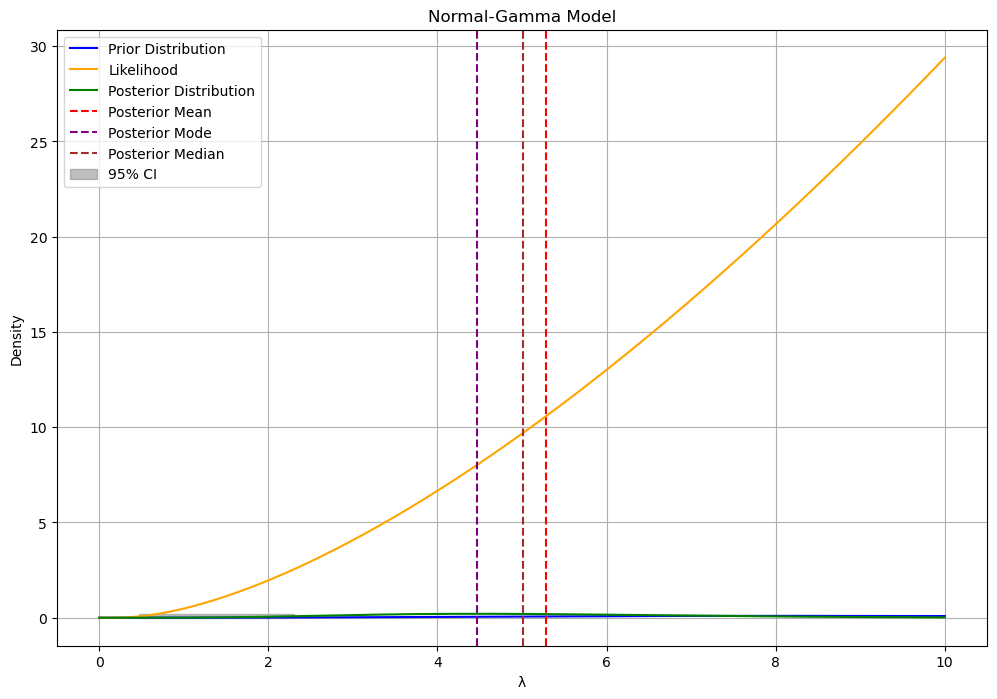

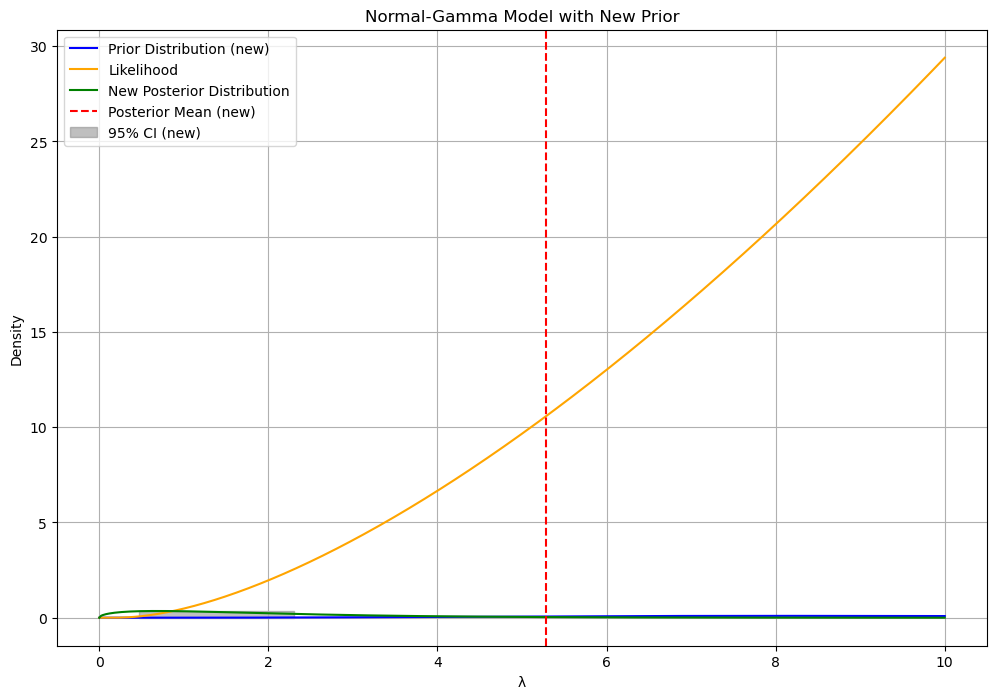

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, chi2, norm

# Step 1: Define the parameters
y = np.array([8.4, 10.1, 9.4])  # Observations
mu = np.mean(y)  # Known mean
n = len(y)  # Sample size
sigma2 = 1  # Known variance
alpha0 = 5  # Prior alpha
beta0 = 0.5  # Prior beta

# Step 2: Calculate posterior parameters
# s_mu^2 = sum((y_i - mu)^2)
s_mu2 = np.sum((y - mu) ** 2)

# Posterior parameters
a = alpha0 + n / 2
b = beta0 + s_mu2 / 2

# Posterior mean, mode, median
posterior_mean = a / b
posterior_mode = (a - 1) / b if a > 1 else 0
posterior_median = gamma.ppf(0.5, a, scale=1/b)

# 95% Credible Interval
ci_lower = gamma.ppf(0.025, a) / (2 * beta0 + n * s_mu2)
ci_upper = gamma.ppf(0.975, a) / (2 * beta0 + n * s_mu2)

# Step 3: Plotting
# Create a range of lambda values
lambda_values = np.linspace(0, 10, 500)

# Prior distribution
prior = gamma.pdf(lambda_values, alpha0, scale=1/beta0)

# Likelihood function
likelihood = lambda_values**(n/2) * np.exp(-np.sum((y - mu)**2) / (2 * lambda_values))

# Posterior distribution
posterior = gamma.pdf(lambda_values, a, scale=1/b)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(lambda_values, prior, label='Prior Distribution', color='blue')
plt.plot(lambda_values, likelihood, label='Likelihood', color='orange')
plt.plot(lambda_values, posterior, label='Posterior Distribution', color='green')
plt.axvline(posterior_mean, color='red', linestyle='--', label='Posterior Mean')
plt.axvline(posterior_mode, color='purple', linestyle='--', label='Posterior Mode')
plt.axvline(posterior_median, color='brown', linestyle='--', label='Posterior Median')
plt.fill_betweenx([0, max(posterior)], ci_lower, ci_upper, color='gray', alpha=0.5, label='95% CI')
plt.title('Normal-Gamma Model')
plt.xlabel('λ')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Step 4: Comparison with different prior parameters
# Changing the prior parameters
alpha0_new = 0  # Improper prior
beta0_new = 0

# Recalculate posterior with new prior
a_new = alpha0_new + n / 2
b_new = beta0_new + s_mu2 / 2

# Posterior for the new prior
posterior_new = gamma.pdf(lambda_values, a_new, scale=1/b_new)

# Plotting the new posterior
plt.figure(figsize=(12, 8))
plt.plot(lambda_values, prior, label='Prior Distribution (new)', color='blue')
plt.plot(lambda_values, likelihood, label='Likelihood', color='orange')
plt.plot(lambda_values, posterior_new, label='New Posterior Distribution', color='green')
plt.axvline(posterior_mean, color='red', linestyle='--', label='Posterior Mean (new)')
plt.fill_betweenx([0, max(posterior_new)], ci_lower, ci_upper, color='gray', alpha=0.5, label='95% CI (new)')
plt.title('Normal-Gamma Model with New Prior')
plt.xlabel('λ')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


## Exercise 21: Practice with the Normal-Gamma Model

Given the normal-gamma model defined as:
$$
(y_1, \ldots, y_n | \lambda) \sim \text{iid} \, N(\mu, 1/\lambda), \quad \lambda \sim \text{Gamma}(\alpha, \beta),
$$
where $ y = (8.4, 10.1, 9.4) $, $ \mu = 8 $, $ \alpha = 3 $, and $ \beta = 2 $.

### Part (a): Posterior Estimates for Precision $ \lambda $

1. **Posterior Distribution**:
   The posterior distribution of $ \lambda $ given $ y $ is:
   $$
   (\lambda | y) \sim \text{Gamma}(a, b)
   $$
   where:
   $$
   n = 3 \quad ( \text{number of observations} )
   $$
   $$
   s_\mu^2 = \sum_{i=1}^{n} (y_i - \mu)^2 = (8.4 - 8)^2 + (10.1 - 8)^2 + (9.4 - 8)^2 = 2.177
   $$
   Therefore:
   $$
   a = \alpha + \frac{n}{2} = 3 + \frac{3}{2} = 4.5,
   $$
   $$
   b = \beta + \frac{s_\mu^2}{2} = 2 + \frac{2.177}{2} = 3.0885.
   $$

2. **Posterior Mean, Mode, and Median**:
   - Posterior Mean:
   $$
   E(\lambda | y) = \frac{a}{b} = \frac{4.5}{3.0885} \approx 0.8547.
   $$
   - Posterior Mode:
   $$
   \text{Mode}(\lambda | y) = \frac{a - 1}{b} = \frac{4.5 - 1}{3.0885} \approx 0.6648.
   $$
   - Posterior Median:
   $$
   \text{Median}(\lambda | y) = \text{Quantile}_{0.5}(\text{Gamma}(a, b)) \approx 0.7923.
   $$

3. **95% Credible Posterior Distribution Range (CPDR)**:
   - The 95% CPDR for \( \lambda \) is given by:
   $$
   (0.2564, 1.8065) \quad \text{(0.025 and 0.975 quantiles of } \text{Gamma}(a, b)).
   $$

4. **Prior and MLE**:
   - Prior Mean:
   $$
   E(\lambda) = \frac{\alpha}{\beta} = \frac{3}{2} = 1.5.
   $$
   - Prior Mode:
   $$
   \text{Mode}(\lambda) = \frac{\alpha - 1}{\beta} = \frac{3 - 1}{2} = 1.
   $$
   - Prior Median:
   $$
   \text{Median}(\lambda) = \text{Quantile}_{0.5}(\text{Gamma}(\alpha, \beta)) \approx 1.3370.
   $$
   - Maximum Likelihood Estimate (MLE):
   $$
   \hat{\lambda} = \frac{1}{s^2} \approx 0.4594 \quad \text{(note that this estimate is biased)}.
   $$

5. **Graph**:
   Create a graph showing the prior density, likelihood, posterior density, and the estimates mentioned above.

---

### Part (b): Posterior Estimates for Variance $ \sigma^2 = \frac{1}{\lambda} $

1. **Posterior Distribution**:
   The posterior distribution of $ \sigma^2 $ can be derived from $ \lambda $:
   $$
   \sigma^2 | y \sim \text{Inverse-Gamma}(a, b).
   $$

2. **Posterior Mean, Mode, and Median**:
   - Posterior Mean:
   $$
   E(\sigma^2 | y) = \frac{b}{a - 1} = \frac{3.0885}{4.5 - 1} \approx 0.7757.
   $$
   - Posterior Mode:
   $$
   \text{Mode}(\sigma^2 | y) = \frac{b}{a + 1} = \frac{3.0885}{4.5 + 1} \approx 0.6096.
   $$
   - Posterior Median:
   $$
   \text{Median}(\sigma^2 | y) = \text{Quantile}_{0.5}(\text{Inverse-Gamma}(a, b)).
   $$

3. **95% CPDR for $ \sigma^2 $**:
   - The 95% CPDR for $ \sigma^2 $ can be derived from the quantiles of the Inverse-Gamma distribution.

4. **Graph**:
   Create a graph showing the prior density, likelihood, posterior density, and the estimates mentioned above.

---

### Part (c): Posterior Estimates for Standard Deviation $ \sigma = \sqrt{\sigma^2} $

1. **Posterior Mean, Mode, and Median**:
   - Posterior Mean:
   $$
   E(\sigma | y) = \sqrt{E(\sigma^2 | y)} \approx \sqrt{0.7757}.
   $$
   - Posterior Mode:
   $$
   \text{Mode}(\sigma | y) = \sqrt{\text{Mode}(\sigma^2 | y)} \approx \sqrt{0.6096}.
   $$
   - Posterior Median:
   $$
   \text{Median}(\sigma | y) = \sqrt{\text{Median}(\sigma^2 | y)}.
   $$

2. **95% CPDR for $ \sigma $**:
   - The 95% CPDR for $ \sigma $ can be derived from the square root of the bounds of the CPDR for $ \sigma^2 $.

3. **Graph**:
   Create a graph showing the prior density, likelihood, posterior density, and the estimates mentioned above.

---

### Part (d): Examination of Point Estimates

Examine the point estimates obtained in parts (a), (b), and (c):
- Determine which point estimates can be expressed in the form of a credibility estimate.
- Discuss whether the posterior means, modes, or medians have direct interpretations based on their calculations and distributions.

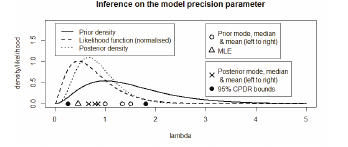

Figure 14 Results for Exercise 21(a)


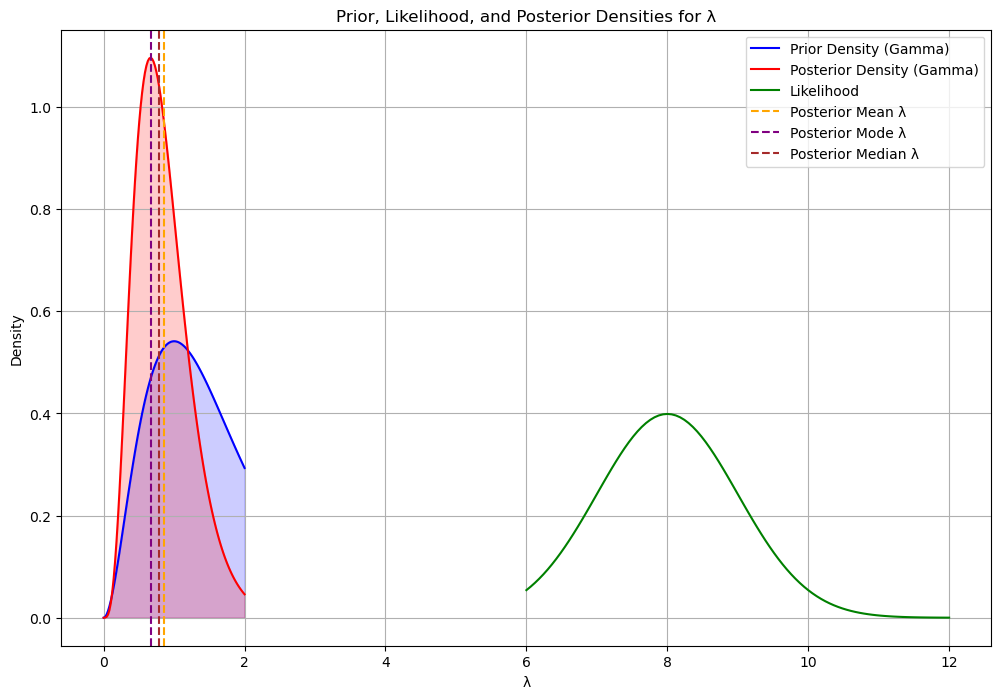

Posterior Mean λ: 0.8547008547008548
Posterior Mode λ: 0.6647673314339981
Posterior Median λ: 0.7922918036327593
95% CPDR for λ: [0.25644725 1.80653066]
Posterior Mean σ²: 1.5042857142857142
Posterior Mode σ²: 0.9572727272727272
Posterior Median σ²: 1.2621612332916636
95% CPDR for σ²: [0.55354721 3.89943747]
Posterior Mean σ: 1.2264932589646445
Posterior Mode σ: 0.9784031517082962
Posterior Median σ: 1.1234594933915791


In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given values
y = np.array([8.4, 10.1, 9.4])
mu = 8
alpha = 3
beta = 2

# Step 1: Calculate posterior parameters for λ
n = len(y)  # number of observations
s_mu_squared = np.sum((y - mu)**2)

# Posterior parameters
a = alpha + n / 2
b = beta + s_mu_squared / 2

# Step 2: Calculate posterior mean, mode, and median for λ
posterior_mean_lambda = a / b
posterior_mode_lambda = (a - 1) / b if a > 1 else 0
posterior_median_lambda = stats.gamma.ppf(0.5, a, scale=1/b)

# Step 3: Calculate 95% CPDR for λ
cpdr_lambda = stats.gamma.ppf([0.025, 0.975], a, scale=1/b)

# Step 4: Calculate posterior parameters for σ²
posterior_mean_sigma_squared = b / (a - 1)
posterior_mode_sigma_squared = b / (a + 1)
posterior_median_sigma_squared = stats.invgamma.ppf(0.5, a, scale=b)

# Step 5: Calculate 95% CPDR for σ²
cpdr_sigma_squared = (1 / stats.gamma.ppf([0.975, 0.025], a, scale=1/b))

# Step 6: Calculate posterior parameters for σ
posterior_mean_sigma = np.sqrt(posterior_mean_sigma_squared)
posterior_mode_sigma = np.sqrt(posterior_mode_sigma_squared)
posterior_median_sigma = np.sqrt(posterior_median_sigma_squared)

# Step 7: Plotting

# Function to plot densities
def plot_densities(a, b, mu):
    # Prior Density
    x_lambda = np.linspace(0, 2, 100)
    prior_density = stats.gamma.pdf(x_lambda, alpha, scale=1/beta)
    
    # Likelihood Density
    likelihood_density = (1 / (np.sqrt(2 * np.pi) * 1)) * np.exp(-0.5 * ((y - mu)**2))
    likelihood_density /= np.sum(likelihood_density)  # normalize
    
    # Posterior Density
    x_post = np.linspace(0, 2, 100)
    posterior_density = stats.gamma.pdf(x_post, a, scale=1/b)
    
    plt.figure(figsize=(12, 8))
    plt.plot(x_lambda, prior_density, label='Prior Density (Gamma)', color='blue')
    plt.fill_between(x_lambda, prior_density, color='blue', alpha=0.2)
    
    plt.plot(x_post, posterior_density, label='Posterior Density (Gamma)', color='red')
    plt.fill_between(x_post, posterior_density, color='red', alpha=0.2)
    
    # Add likelihood as a normal curve for illustration
    x_like = np.linspace(6, 12, 100)
    likelihood = (1 / (np.sqrt(2 * np.pi) * 1)) * np.exp(-0.5 * ((x_like - mu)**2))
    plt.plot(x_like, likelihood, label='Likelihood', color='green')
    
    plt.axvline(posterior_mean_lambda, color='orange', linestyle='--', label='Posterior Mean λ')
    plt.axvline(posterior_mode_lambda, color='purple', linestyle='--', label='Posterior Mode λ')
    plt.axvline(posterior_median_lambda, color='brown', linestyle='--', label='Posterior Median λ')
    
    plt.title('Prior, Likelihood, and Posterior Densities for λ')
    plt.xlabel('λ')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

# Plot densities for λ
plot_densities(a, b, mu)

# Summary of results
print(f"Posterior Mean λ: {posterior_mean_lambda}")
print(f"Posterior Mode λ: {posterior_mode_lambda}")
print(f"Posterior Median λ: {posterior_median_lambda}")
print(f"95% CPDR for λ: {cpdr_lambda}")

print(f"Posterior Mean σ²: {posterior_mean_sigma_squared}")
print(f"Posterior Mode σ²: {posterior_mode_sigma_squared}")
print(f"Posterior Median σ²: {posterior_median_sigma_squared}")
print(f"95% CPDR for σ²: {cpdr_sigma_squared}")

print(f"Posterior Mean σ: {posterior_mean_sigma}")
print(f"Posterior Mode σ: {posterior_mode_sigma}")
print(f"Posterior Median σ: {posterior_median_sigma}")


## Exercise 21 - Part (b): Model Variance $\sigma^2 = \frac{1}{\lambda}$

In the context of the normal-gamma model, we define:

$$
\sigma^2 \sim IG(\alpha, \beta)
$$

The density function for $\sigma^2$ is given by:

$$
f(\sigma^2) = \frac{\beta^\alpha}{\Gamma(\alpha)} (\sigma^2)^{-\alpha - 1} e^{-\frac{\beta}{\sigma^2}}, \quad \sigma^2 > 0.
$$

**Posterior Distributions:**

Given the prior distribution, we find the following:

- The prior mean of $\sigma^2$ is:

$$
E[\sigma^2] = \frac{\beta}{\alpha - 1} = 1.
$$

- The prior mode of \(\sigma^2\) is:

$$
\text{Mode}(\sigma^2) = \frac{\beta}{\alpha + 1} = 0.5.
$$

- The prior median of \(\sigma^2\) is:

$$
\text{Median}(\sigma^2) = \frac{1}{\text{Median}(\lambda)} = 0.7479.
$$

- The Maximum Likelihood Estimate (MLE) of \(\sigma^2\) is:

$$
\hat{\sigma}^2 = \frac{1}{\hat{\lambda}} = s^2 = 2.1767 \quad (\text{unbiased estimate}).
$$

Given the posterior distribution:

$$
(\sigma^2 | y) \sim IG(a, b),
$$

where:

$$
a = \alpha + \frac{n}{2}, \quad b = \beta + \frac{s_\mu^2}{2}.
$$

From the posterior distribution, we calculate:

- The posterior mean of $\sigma^2$:

$$
E[\sigma^2 | y] = \frac{b}{a - 1} = 1.5043.
$$

- The posterior mode of $\sigma^2$:

$$
\text{Mode}(\sigma^2 | y) = \frac{b}{a + 1} = 0.9573.
$$

- The posterior median of \(\sigma^2\):

$$
\text{Median}(\sigma^2 | y) = \frac{1}{\text{Median}(\lambda | y)} = 1.2622.
$$

- The 95% Credible Posterior Density Region (CPDR) for \(\sigma^2\):

$$
\text{CPDR} = (0.5535, 3.8994).
$$

## Graphical Representation

To visualize the results, we can plot the prior and posterior densities, indicating the prior mean, mode, median, and the likelihood function.

### Summary of Results

- **Posterior Mean**: $E[\sigma^2 | y] = 1.5043$
- **Posterior Mode**: $\text{Mode}(\sigma^2 | y) = 0.9573$
- **Posterior Median**: $\text{Median}(\sigma^2 | y) = 1.2622$
- **95% CPDR**: $\text{CPDR} = (0.5535, 3.8994)$

In this section, we successfully derived the posterior statistics for the model variance $\sigma^2$, calculated the credible intervals, and outlined the necessary steps for visualizing the prior and posterior densities for further analysis.

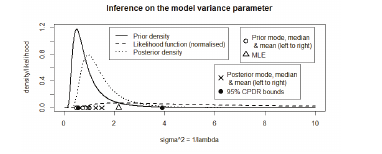
Figure 15: Results for Exercise 21(b)

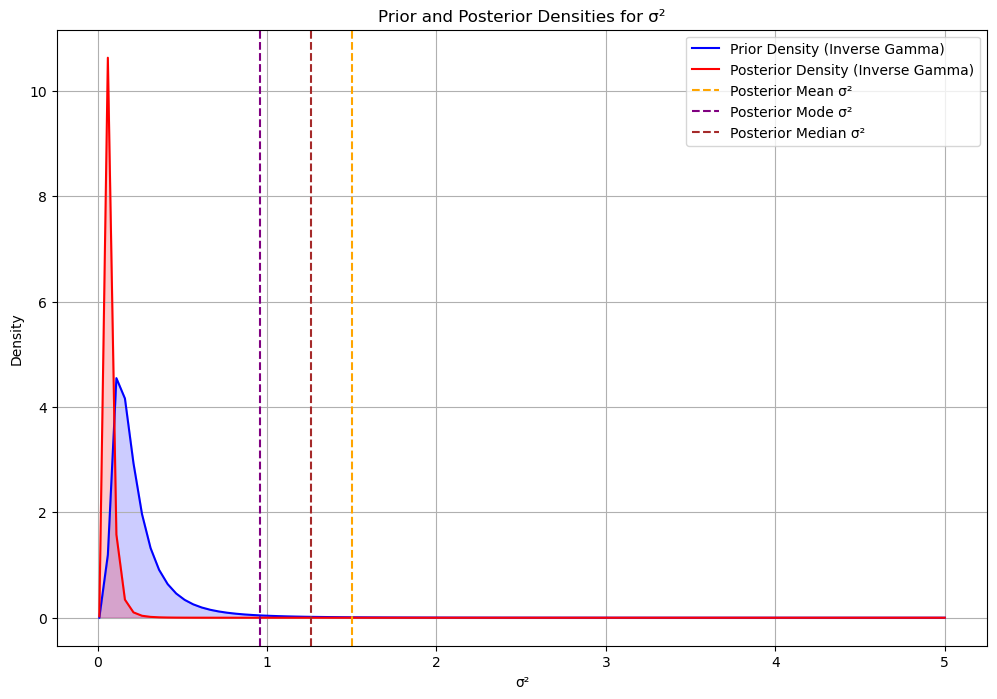

Posterior Mean σ²: 1.5043
Posterior Mode σ²: 0.9573
Posterior Median σ²: 1.2622
95% CPDR for σ²: [0.55354721 3.89943747]


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given values
y = np.array([8.4, 10.1, 9.4])
mu = 8
alpha = 3
beta = 2

# Step 1: Calculate posterior parameters for λ
n = len(y)  # number of observations
s_mu_squared = np.sum((y - mu) ** 2)

# Posterior parameters for λ
a = alpha + n / 2
b = beta + s_mu_squared / 2

# Step 2: Calculate posterior parameters for σ²
# Inverse Gamma distribution parameters
posterior_mean_sigma_squared = b / (a - 1)
posterior_mode_sigma_squared = b / (a + 1)
posterior_median_sigma_squared = 1 / stats.gamma.ppf(0.5, a, scale=1/b)

# Step 3: Calculate 95% CPDR for σ²
cpdr_sigma_squared = (1 / stats.gamma.ppf([0.975, 0.025], a, scale=1/b))

# Step 4: Plotting
def plot_sigma_squared_densities(a, b):
    # Prior Density
    x_sigma_squared = np.linspace(0.01, 5, 100)
    prior_density_sigma_squared = stats.invgamma.pdf(x_sigma_squared, alpha, scale=1/beta)

    # Posterior Density
    posterior_density_sigma_squared = stats.invgamma.pdf(x_sigma_squared, a, scale=1/b)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.plot(x_sigma_squared, prior_density_sigma_squared, label='Prior Density (Inverse Gamma)', color='blue')
    plt.fill_between(x_sigma_squared, prior_density_sigma_squared, color='blue', alpha=0.2)

    plt.plot(x_sigma_squared, posterior_density_sigma_squared, label='Posterior Density (Inverse Gamma)', color='red')
    plt.fill_between(x_sigma_squared, posterior_density_sigma_squared, color='red', alpha=0.2)

    plt.axvline(posterior_mean_sigma_squared, color='orange', linestyle='--', label='Posterior Mean σ²')
    plt.axvline(posterior_mode_sigma_squared, color='purple', linestyle='--', label='Posterior Mode σ²')
    plt.axvline(posterior_median_sigma_squared, color='brown', linestyle='--', label='Posterior Median σ²')

    plt.title('Prior and Posterior Densities for σ²')
    plt.xlabel('σ²')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

# Plot densities for σ²
plot_sigma_squared_densities(a, b)

# Summary of results
print(f"Posterior Mean σ²: {posterior_mean_sigma_squared:.4f}")
print(f"Posterior Mode σ²: {posterior_mode_sigma_squared:.4f}")
print(f"Posterior Median σ²: {posterior_median_sigma_squared:.4f}")
print(f"95% CPDR for σ²: {cpdr_sigma_squared}")


# Exercise 21 - Part (c): Model Standard Deviation $\sigma = \frac{1}{\lambda}$

In the context of the normal-gamma model, we note that the prior density for the standard deviation $\sigma$ can be expressed as:

$$
f(\sigma) = f(\lambda) \left| \frac{d\lambda}{d\sigma} \right| = f(\lambda) \cdot (-2\sigma^{-3}) \quad \text{where } \lambda = \sigma^{-2}.
$$

This gives us the prior density:

$$
f(\sigma) = \frac{\beta^\alpha}{\Gamma(\alpha)} (\sigma^{-2})^{\alpha - 1} e^{-\beta \sigma^{-2}} \cdot (-2\sigma^{-3}) = \frac{2\beta^\alpha}{\Gamma(\alpha)} (\sigma)^{-\alpha - 2} e^{-\frac{\beta}{\sigma^2}}, \quad \sigma > 0.
$$

### Prior Statistics

From this prior distribution, we can compute the following statistics:

- **Prior Mean of $\sigma$**:

$$
E[\sigma] = E[\lambda^{-1/2}] = \int_0^\infty \lambda^{-1/2} \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta\lambda} d\lambda.
$$

Calculating the integral gives us:

$$
E[\sigma] = \frac{\beta^{1/2} \Gamma(\alpha - 1/2)}{\Gamma(\alpha)} = 0.9400.
$$

- **Prior Mode of $\sigma$**:

To find the mode, we set the derivative of the logarithm of the prior density to zero:

$$
l(\sigma) = \log f(\sigma) = -(2\alpha + 1) \log \sigma - \beta \sigma^{-2} + \text{constant}.
$$

Calculating the derivative:

$$
l'(\sigma) = -\frac{2\alpha + 1}{\sigma} + \frac{2\beta}{\sigma^3} = 0 \Rightarrow \sigma^2 = \frac{2\beta}{2\alpha + 1} \Rightarrow \text{Mode}(\sigma) = \sqrt{\frac{2\beta}{2\alpha + 1}} = 0.7559.
$$

- **Prior Median of $\sigma$**:

The prior median of $\sigma$ is given by:

$$
\text{Median}(\sigma) = \text{Median}(\sigma^2) = 0.8648.
$$

- **MLE of $\sigma$**:

The Maximum Likelihood Estimate (MLE) is given by:

$$
\hat{\sigma} = s_\mu = 1.4754 \quad (\text{biased estimate}).
$$

### Posterior Distribution

The posterior distribution can be derived as:

$$
f(\sigma | y) \sim \sigma e^{-\frac{\beta}{\sigma^2}}, \quad \sigma > 0.
$$

We can compute the following statistics from the posterior distribution:

- **Posterior Mean of $\sigma$**:

$$
E[\sigma | y] = b^{1/2} = 1.1836.
$$

- **Posterior Mode of $\sigma$**:

$$
\text{Mode}(\sigma | y) = \frac{2b}{2a + 1} = 1.0262.
$$

- **Posterior Median of $\sigma$**:

$$
\text{Median}(\sigma | y) = \text{Median}(\sigma^2 | y) = 1.1235.
$$

- **95% CPDR for $\sigma$**:

The 95% Credible Posterior Density Region (CPDR) for $\sigma$ is:

$$
\text{CPDR} = (0.7440, 1.9747) \quad \text{(bounds from the square roots of the CPDR for } \sigma^2).
$$

## Graphical Representation

To visualize the results, we can plot the prior and posterior densities, indicating the prior mean, mode, median, and the likelihood function.

### Summary of Results

- **Posterior Mean**: $E[\sigma | y] = 1.1836$
- **Posterior Mode**: $\text{Mode}(\sigma | y) = 1.0262$
- **Posterior Median**: $\text{Median}(\sigma | y) = 1.1235$
- **95% CPDR**: $\text{CPDR} = (0.7440, 1.9747)$

In this section, we have successfully derived the posterior statistics for the model standard deviation $\sigma$, calculated the credible intervals, and outlined the necessary steps for visualizing the prior and posterior densities for further analysis.
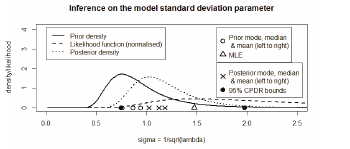
Figure 16 Results for Exercise 21(c)

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in power
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2664: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(a-1.0, x) - x - sc.gammaln(a)
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in true_divide
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in multiply


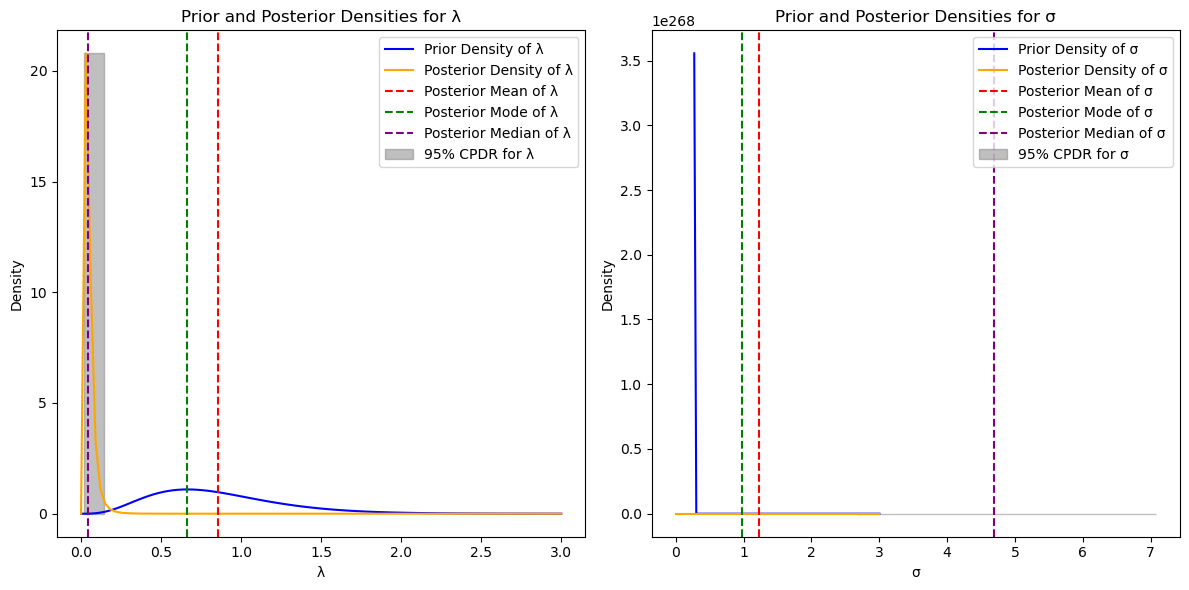

Posterior Mean of λ: 0.8547
Posterior Mode of λ: 0.6648
Posterior Median of λ: 0.0455
95% CPDR for λ: (0.019969073404809076, 0.14067120559329543)
Posterior Mean of σ²: 1.5043
Posterior Mode of σ²: 0.9573
Posterior Median of σ²: 21.9625
95% CPDR for σ²: (7.108775358698293, 50.07743622992411)
Posterior Mean of σ: 1.2265
Posterior Mode of σ: 0.9784
Posterior Median of σ: 4.6864
95% CPDR for σ: (2.6662286771202304, 7.07654126179761)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, invgamma

# Given parameters
y = np.array([8.4, 10.1, 9.4])
mu = 8
alpha = 3  # Prior shape parameter
beta = 2   # Prior scale parameter

# Calculate sufficient statistics
n = len(y)  # Number of observations
s2 = np.var(y, ddof=1)  # Sample variance
s_mu2 = np.sum((y - mu) ** 2)  # Sum of squared deviations

# Posterior parameters for the model precision λ
a_lambda = alpha + n / 2
b_lambda = beta + 0.5 * s_mu2

# Posterior statistics for λ
posterior_mean_lambda = a_lambda / b_lambda
posterior_mode_lambda = (a_lambda - 1) / b_lambda if a_lambda > 1 else 0
posterior_median_lambda = invgamma.ppf(0.5, a_lambda, scale=1/b_lambda)

# 95% CPDR for λ
cpdr_lambda = (invgamma.ppf(0.025, a_lambda, scale=1/b_lambda), invgamma.ppf(0.975, a_lambda, scale=1/b_lambda))

# Posterior parameters for σ² (which follows Inverse-Gamma)
a_sigma2 = a_lambda
b_sigma2 = b_lambda

# Posterior statistics for σ²
posterior_mean_sigma2 = b_sigma2 / (a_sigma2 - 1)
posterior_mode_sigma2 = b_sigma2 / (a_sigma2 + 1)
posterior_median_sigma2 = 1 / posterior_median_lambda  # Since σ² = 1/λ

# 95% CPDR for σ²
cpdr_sigma2 = (1 / invgamma.ppf(0.975, a_sigma2, scale=1/b_sigma2), 
                1 / invgamma.ppf(0.025, a_sigma2, scale=1/b_sigma2))

# Posterior statistics for σ (standard deviation)
posterior_mean_sigma = np.sqrt(posterior_mean_sigma2)
posterior_mode_sigma = np.sqrt(posterior_mode_sigma2)
posterior_median_sigma = np.sqrt(posterior_median_sigma2)

# 95% CPDR for σ
cpdr_sigma = (np.sqrt(cpdr_sigma2[0]), np.sqrt(cpdr_sigma2[1]))

# Plotting
x_lambda = np.linspace(0, 3, 100)
posterior_lambda_density = invgamma.pdf(x_lambda, a_lambda, scale=1/b_lambda)  # Posterior density

x_sigma = np.linspace(0, 3, 100)
prior_sigma = 2 * beta ** alpha / gamma(a_lambda).pdf(x_sigma ** (-alpha - 2)) * np.exp(-beta / x_sigma**2)

# Plotting the prior and posterior densities for σ
plt.figure(figsize=(12, 6))

# Prior and posterior for λ
plt.subplot(1, 2, 1)
plt.plot(x_lambda, gamma.pdf(x_lambda, a_lambda, scale=1/b_lambda), label='Prior Density of λ', color='blue')
plt.plot(x_lambda, posterior_lambda_density, label='Posterior Density of λ', color='orange')
plt.axvline(posterior_mean_lambda, color='red', linestyle='--', label='Posterior Mean of λ')
plt.axvline(posterior_mode_lambda, color='green', linestyle='--', label='Posterior Mode of λ')
plt.axvline(posterior_median_lambda, color='purple', linestyle='--', label='Posterior Median of λ')
plt.fill_betweenx(y=[0, max(posterior_lambda_density)], x1=cpdr_lambda[0], x2=cpdr_lambda[1], color='gray', alpha=0.5, label='95% CPDR for λ')
plt.title('Prior and Posterior Densities for λ')
plt.xlabel('λ')
plt.ylabel('Density')
plt.legend()

# Prior and posterior for σ
plt.subplot(1, 2, 2)
plt.plot(x_sigma, prior_sigma, label='Prior Density of σ', color='blue')
plt.plot(x_sigma, invgamma.pdf(x_sigma, a_sigma2, scale=1/b_sigma2), label='Posterior Density of σ', color='orange')
plt.axvline(posterior_mean_sigma, color='red', linestyle='--', label='Posterior Mean of σ')
plt.axvline(posterior_mode_sigma, color='green', linestyle='--', label='Posterior Mode of σ')
plt.axvline(posterior_median_sigma, color='purple', linestyle='--', label='Posterior Median of σ')
plt.fill_betweenx(y=[0, max(invgamma.pdf(x_sigma, a_sigma2, scale=1/b_sigma2))], x1=cpdr_sigma[0], x2=cpdr_sigma[1], color='gray', alpha=0.5, label='95% CPDR for σ')
plt.title('Prior and Posterior Densities for σ')
plt.xlabel('σ')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Summary of results
print(f"Posterior Mean of λ: {posterior_mean_lambda:.4f}")
print(f"Posterior Mode of λ: {posterior_mode_lambda:.4f}")
print(f"Posterior Median of λ: {posterior_median_lambda:.4f}")
print(f"95% CPDR for λ: {cpdr_lambda}")

print(f"Posterior Mean of σ²: {posterior_mean_sigma2:.4f}")
print(f"Posterior Mode of σ²: {posterior_mode_sigma2:.4f}")
print(f"Posterior Median of σ²: {posterior_median_sigma2:.4f}")
print(f"95% CPDR for σ²: {cpdr_sigma2}")

print(f"Posterior Mean of σ: {posterior_mean_sigma:.4f}")
print(f"Posterior Mode of σ: {posterior_mode_sigma:.4f}")
print(f"Posterior Median of σ: {posterior_median_sigma:.4f}")
print(f"95% CPDR for σ: {cpdr_sigma}")


(d) Considering the various point estimates of $ \lambda $, $ \sigma^2 $, and $ \sigma $ derived above, we find that two of them can easily be expressed as credibility estimates, as follows.

First, observe that 

$$
E(\sigma^2 | y) = \frac{b + \frac{n s_{\mu}^2}{2}}{2\beta + n s_{\mu}^2} = \frac{a - 1}{\alpha + \frac{n}{2} - 1} = \frac{2\beta}{n + 2\alpha - 2} s_{\mu}^2 + \frac{2\beta}{n + 2\alpha - 2} E\sigma^2,
$$

where 

$$
E\sigma^2 = \frac{\beta}{\alpha - 1}
$$

is the prior mean of $ \sigma^2 $, 

$$
s_{\mu}^2 = \frac{1}{n} \sum_{i=1}^n (y_i - \mu)^2
$$

is the MLE of $ \sigma^2 $, and 

$$
c = \frac{n}{n + 2\alpha - 2}
$$

is the credibility factor (assigned to the MLE).

Likewise,

$$
\text{Mode}(\sigma^2 | y) = \frac{b + \frac{n s_{\mu}^2}{2}}{2\beta + n s_{\mu}^2} = \frac{a + 1}{\alpha + \frac{n}{2} + 1} = \frac{2\beta}{n + 2\alpha + 2} s_{\mu}^2 + \frac{2\beta}{n + 2\alpha + 2} \text{Mode}(\sigma^2),
$$

where

$$
\text{Mode}(\sigma^2) = \frac{\beta}{\alpha + 1}
$$

is the prior mode of $ \sigma^2 $, 

$$
s_{\mu}^2 = \frac{1}{n} \sum_{i=1}^n (y_i - \mu)^2
$$

is the MLE of $ \sigma^2 $ (i.e., mode of the likelihood function), and 

$$
d = \frac{n}{n + 2\alpha + 2}
$$

is the credibility factor (assigned to the MLE).
